# **Titanic - Machine Learning From Disaster**

## **Random Forest Classifier**

### **Import Libraries**

In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler

### **Import datasets**

In [62]:
train_data = pd.read_csv('datasets/train.csv')
test_data = pd.read_csv('datasets/test.csv')

### **Check train_data and test_data**

In [63]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [64]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### **Check null value**

In [65]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [66]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### **Fill null value on each column**

In [67]:
train_data['Age'].fillna(value=train_data['Age'].mean(), inplace=True)
train_data['Cabin'].fillna(value='DECK', inplace=True)
train_data['Embarked'].fillna(value=train_data['Embarked'].mode, inplace=True)

test_data['Age'].fillna(value=test_data['Age'].mean(), inplace=True)
test_data['Fare'].fillna(value=test_data['Fare'].mean(), inplace=True)
test_data['Cabin'].fillna(value='DECK', inplace=True)

C:\Users\LOQ\AppData\Local\Temp\ipykernel_27832\2028498363.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Age'].fillna(value=train_data['Age'].mean(), inplace=True)
C:\Users\LOQ\AppData\Local\Temp\ipykernel_27832\2028498363.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

### **Check survival rate for women and men**

In [68]:
women = train_data.loc[train_data.Sex == 'female']['Survived']
rate_women = sum(women)/len(women)

print('Women survival rate: ', rate_women)

Women survival rate:  0.7420382165605095


In [69]:
men = train_data.loc[train_data.Sex == 'male']['Survived']
rate_men = sum(men)/len(men)

print('Men survival rate: ', rate_men)

Men survival rate:  0.18890814558058924


In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

<Axes: >

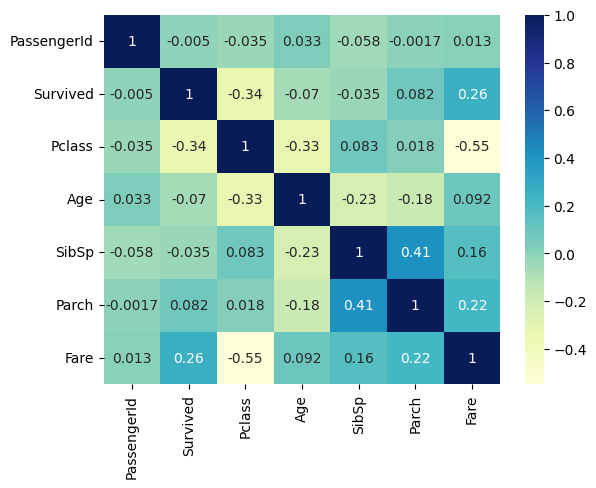

In [71]:
numeric_data = train_data.select_dtypes(include=[np.number])
sns.heatmap(numeric_data.corr(), cmap="YlGnBu", annot=True)

In [121]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_data["Embarked"] = le.fit_transform(train_data["Embarked"].astype(str))
test_data["Embarked"] = le.fit_transform(test_data["Embarked"].astype(str))

In [128]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
train_data['Age'] = std.fit_transform(train_data[['Age']])
test_data['Age'] = std.fit_transform(test_data[['Age']])

0    3
1    1
2    3
3    3
4    3
Name: Embarked, dtype: int32

In [170]:
y_train = train_data['Survived']

features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Embarked"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

In [171]:
# model_svc = SVC()

# param_grid = {'C': [0.1, 1, 10, 100, 1000],  
#               'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
#               'kernel': ['rbf', 'sigmoid']}  
# svc = GridSearchCV(model_svc, param_grid, scoring='accuracy', cv=5)
# svc.fit(X, y_train)
# svc.best_params_

from sklearn.linear_model import LogisticRegression, SGDClassifier

log_reg = LogisticRegression()

param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    'C': [2, 1, 0.01, 0.001, 0.0001],
    'max_iter': [50, 100, 120, 150, 200],
    'class_weight': ['balanced']
}

logistic = GridSearchCV(log_reg, param_grid, scoring='accuracy', cv=5)
logistic.fit(X, y_train)
logistic.best_params_

d:\Kuliah\Polinema\Sinau\Machine Learning\tfkernel\tfvenv\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\Kuliah\Polinema\Sinau\Machine Learning\tfkernel\tfvenv\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\Kuliah\Polinema\Sinau\Machine Learning\tfkernel\tfvenv\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\Kuliah\Polinema\Sinau\Machine Learning\tfkernel\tfvenv\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\Kuliah\Polinema\Sinau\Machine Learning\tfkernel\tfvenv\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached w

{'C': 0.01,
 'class_weight': 'balanced',
 'max_iter': 50,
 'penalty': 'l2',
 'solver': 'liblinear'}

In [172]:
from sklearn.ensemble import RandomForestClassifier

model_rfc = RandomForestClassifier()

param_grid = {
    'n_estimators': [10, 25, 50, 100, 200],
    'criterion': ['gini', 'entropy', 'log_loss'],
}

rfc = GridSearchCV(model_rfc, param_grid, scoring='accuracy', cv=5)
rfc.fit(X, y_train)
rfc.best_params_

{'criterion': 'log_loss', 'n_estimators': 100}

In [176]:
from sklearn.metrics import accuracy_score
prediction_log = logistic.predict(X)

prediction_rfc = rfc.predict(X)
print(f'{accuracy_score(y_train, prediction_log)*100:.2f}%')
print(f'{accuracy_score(y_train, prediction_rfc)*100:.2f}%')

prediction_rfc_test = rfc.predict(X_test)
prediction_svc_test = logistic.predict(X_test)
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': prediction_svc_test})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

79.35%
93.71%
Your submission was successfully saved!


## **SVM**

In [203]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [18]:
train_data = pd.read_csv('datasets/train.csv')
test_data = pd.read_csv('datasets/test.csv')

In [383]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [384]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [385]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [386]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [19]:
train_data['Age'].fillna(value=train_data['Age'].mean(), inplace=True)
train_data['Cabin'].fillna(value='DECK', inplace=True)
train_data['Embarked'].fillna(value=train_data['Embarked'].mode, inplace=True)

test_data['Age'].fillna(value=test_data['Age'].mean(), inplace=True)
test_data['Fare'].fillna(value=test_data['Fare'].mean(), inplace=True)
test_data['Cabin'].fillna(value='DECK', inplace=True)

C:\Users\LOQ\AppData\Local\Temp\ipykernel_27832\2028498363.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Age'].fillna(value=train_data['Age'].mean(), inplace=True)
C:\Users\LOQ\AppData\Local\Temp\ipykernel_27832\2028498363.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

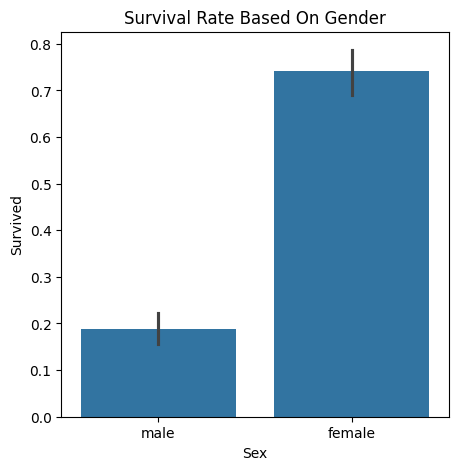

In [388]:
plt.figure(figsize= (5, 5))
sns.barplot(x='Sex', y='Survived', data=train_data)
plt.title("Survival Rate Based On Gender")
plt.xlabel("Sex")
plt.ylabel("Survived")
plt.show()

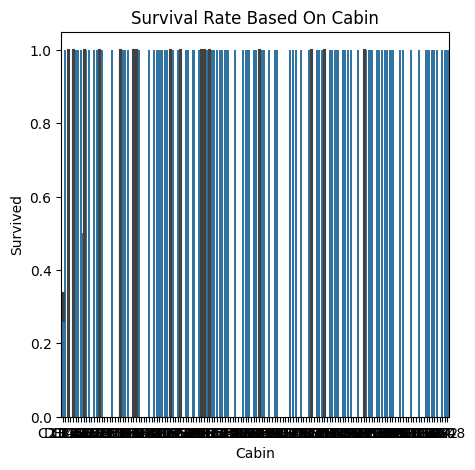

In [389]:
plt.figure(figsize=(5,5))
sns.barplot(x='Cabin', y='Survived', data=train_data)
plt.title("Survival Rate Based On Cabin")
plt.xlabel("Cabin")
plt.ylabel("Survived")
plt.show()

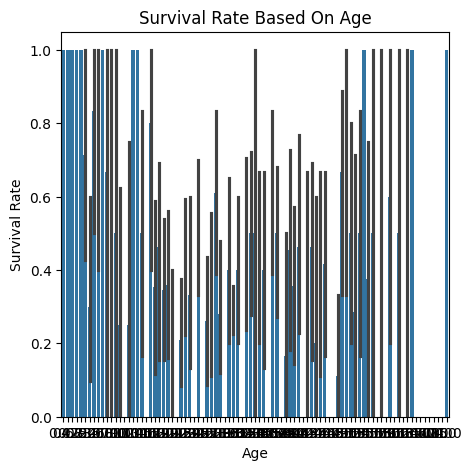

In [390]:
plt.figure(figsize=(5,5))
sns.barplot(x="Age", y="Survived", data=train_data)
plt.title("Survival Rate Based On Age")
plt.xlabel("Age")
plt.ylabel("Survival Rate")
plt.show()

In [20]:
le = LabelEncoder()
std = StandardScaler()

In [392]:
train_data['Age'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Age
Non-Null Count  Dtype  
--------------  -----  
891 non-null    float64
dtypes: float64(1)
memory usage: 7.1 KB


In [21]:
train_data['Sex'] = le.fit_transform(train_data['Sex'])
train_data['Cabin'] = le.fit_transform(train_data['Cabin'])
# train_data['Embarked'] = train_data['Embarked'].map({'Q': 0, 'S': 1, 'C':2})
train_data['Embarked'] = le.fit_transform(train_data['Embarked'].astype(str))

test_data['Sex'] = le.fit_transform(test_data['Sex'])
test_data['Cabin'] = le.fit_transform(test_data['Cabin'])
# test_data['Embarked'] = test_data['Embarked'].map({'Q': 0, 'S': 1, 'C': 2})
test_data['Embarked'] = le.fit_transform(test_data['Embarked'].astype(str))


In [394]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,115,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,81,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,115,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,55,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,115,3


In [395]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Survived  891 non-null    int64  
 2   Age       891 non-null    float64
 3   Sex       891 non-null    int32  
 4   Cabin     891 non-null    int32  
 5   SibSp     891 non-null    int64  
 6   Embarked  891 non-null    int32  
 7   Parch     891 non-null    int64  
dtypes: float64(1), int32(3), int64(4)
memory usage: 45.4 KB


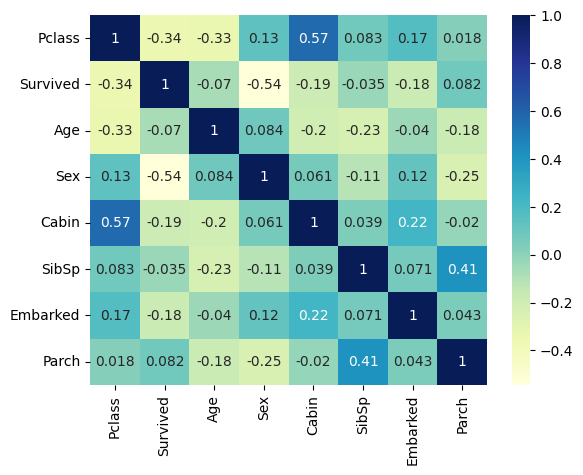

In [25]:
features = ['Pclass','Survived', 'Age', 'Sex', 'Cabin', 'SibSp', 'Embarked', 'Parch']
target = 'Embarked'

X_train = train_data[features]
# X_test = test_data[features]

y_train = train_data[target]
y_test = test_data[target]


sns.heatmap(X_train.corr(), cmap="YlGnBu", annot=True)
X_train.info()

In [397]:
features = ['Parch', 'Age', 'SibSp', 'Cabin', 'Embarked']
model_svc = SVC()

params = [
    {
        'kernel': ['rbf', 'sigmoid', 'linear'],
        'C' : [1, 10, 100],
        'degree' : [1, 3, 5],
        'max_iter' : [10, 50, 100]
    }
]

svc = GridSearchCV(model_svc, param_grid=params, scoring='accuracy', cv=10)
svc.fit(X_train, y_train)
svc.best_params_

d:\Kuliah\Polinema\Sinau\Machine Learning\tfkernel\tfvenv\lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(
d:\Kuliah\Polinema\Sinau\Machine Learning\tfkernel\tfvenv\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
d:\Kuliah\Polinema\Sinau\Machine Learning\tfkernel\tfvenv\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
d:\Kuliah\Polinema\Sinau\Machine Learning\tfkernel\tfvenv\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
d:\Kuliah\Polinema\Sin

{'C': 1, 'degree': 1, 'gamma': 'auto', 'kernel': 'sigmoid', 'max_iter': 10}

In [398]:
prediction = svc.predict(X_test)

In [399]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, prediction)

print(accuracy)

0.0
